# Exponential Smoothing Model for Stock Price Forecasting (2023-2024)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv(r'C:\Users\Vishnu\Downloads\stocks.csv')



In [93]:
data

,Ticker,Date,Open,High,Low,Close,Volume
0,AAPL,07/02/2023,150.639999,155.229996,150.639999,154.649994,83322600
1,AAPL,08/02/2023,153.880005,154.580002,151.169998,151.919998,64120100
2,AAPL,09/02/2023,153.779999,154.330002,150.419998,150.869995,56007100
3,AAPL,10/02/2023,149.460007,151.339996,149.220001,151.009995,57450700
4,AAPL,13/02/2023,150.949997,154.259995,150.919998,153.850006,62199000
...,...,...,...,...,...,...,...
243,GOOG,01/05/2023,107.720001,108.680000,107.500000,107.709999,20926300
244,GOOG,02/05/2023,107.660004,107.730003,104.500000,105.980003,20343100
245,GOOG,03/05/2023,106.220001,108.129997,105.620003,106.120003,17116300
246,GOOG,04/05/2023,106.160004,106.300003,104.699997,105.209999,19780600


In [95]:
# Convert 'Date' column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

data

,Ticker,Open,High,Low,Close,Volume
Date,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,62199000
...,...,...,...,...,...,...
2023-05-01,GOOG,107.720001,108.680000,107.500000,107.709999,20926300
2023-05-02,GOOG,107.660004,107.730003,104.500000,105.980003,20343100
2023-05-03,GOOG,106.220001,108.129997,105.620003,106.120003,17116300


In [97]:

# Split the data into training and testing sets
train = data_filtered.iloc[:-30]  # Training data: all but the last 30 days
test = data_filtered.iloc[-30:]     # Testing data: last 30 days


In [99]:
# Fit the Exponential Smoothing model (with trend but no seasonality)
es_model = ExponentialSmoothing(train['Close'], trend='add', seasonal=None).fit()

# Forecast for the test period
es_forecast = es_model.forecast(len(test))

# Check for NaN values
print("Exponential Smoothing Forecast NaNs:", es_forecast.isnull().sum())

# Drop NaNs 
es_forecast = es_forecast.dropna()



Exponential Smoothing Forecast NaNs: 0


In [101]:
# Ensure both series have the same length
if len(test['Close']) == len(es_forecast):
    # Evaluate Exponential Smoothing model
    es_mae = mean_absolute_error(test['Close'], es_forecast)
    es_rmse = np.sqrt(mean_squared_error(test['Close'], es_forecast))
    print(f'Exponential Smoothing MAE: {es_mae}')
    print(f'Exponential Smoothing RMSE: {es_rmse}')
else:
    print("Cannot evaluate Exponential Smoothing: Mismatch in lengths after dropping NaNs.")

Exponential Smoothing MAE: 3.823886001777916
Exponential Smoothing RMSE: 4.36839718679418


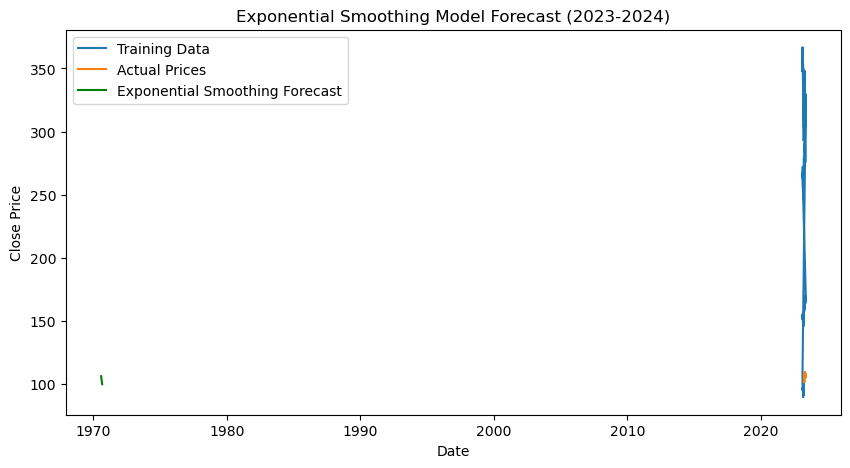

In [103]:
# Plot the Exponential Smoothing forecast
plt.figure(figsize=(10, 5))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Prices')
plt.plot(es_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Model Forecast (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()